# Example 5.8

Source localization example.

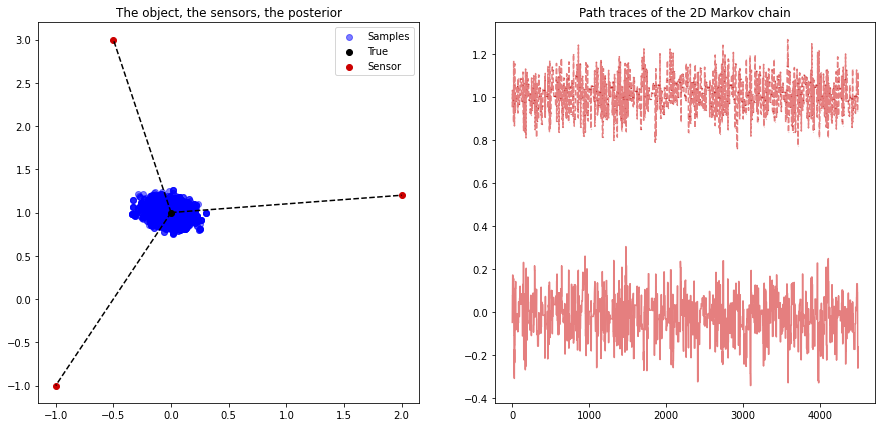

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

rng = np.random.default_rng(32)

x_true = np.array([0, 1])
R = 0.1

s = np.array([[2, 1.2], [-1, -1],[-0.5, 3]])

def p(x, mu, K): # multivariate gaussian density using scipy stats
    return stats.multivariate_normal.pdf(x, mean=mu, cov=K)

def log_p(x, mu, K): # log of multivariate gaussian density using scipy stats
    return stats.multivariate_normal.logpdf(x, mean=mu, cov=K)

def p_1d(x, mu, sig): # 1d gaussian
    return 1/np.sqrt(2*np.pi * sig**2) * np.exp(-(x-mu)**2/(2*sig**2))

def log_p_1d(x, mu, sig):
    return -0.5*np.log(2*np.pi*sig**2) - (x-mu)**2/(2*sig**2)

y = np.zeros((3, 1))
y[0] = np.random.normal(np.linalg.norm(s[0] - x_true), R, 1)
y[1] = np.random.normal(np.linalg.norm(s[1] - x_true), R, 1)
y[2] = np.random.normal(np.linalg.norm(s[2] - x_true), R, 1)

N = 5000

m = np.array([0, 0])
P = 20 * np.array([[1, 0], [0, 1]])

sigma = 0.04
P_prop = sigma * np.array([[1, 0], [0, 1]])

x = np.zeros((2, N))

x[:, 0] = np.array([-3, -3])

burnin = 500

acc = 0

fig = plt.figure(figsize=(15, 7))

for n in range(1, N):

    x_s = rng.multivariate_normal(x[:, n-1], P_prop, 1)

    u = rng.uniform(0, 1, 1)

    # we will terms separately
    logr1 = log_p(x_s, m, P) - log_p(x[:, n-1], m, P) # terms relating to p(x)
    logr2 = 0
    for i in range(3):
        # compute the lik term relating to the datapoint i
        logr2_i = log_p_1d(y[i], np.linalg.norm(s[i] - x_s), R) - log_p_1d(y[i], np.linalg.norm(s[i] - x[:, n-1]), R)
        logr2 = logr2 + logr2_i

    logr = logr1 + logr2

    if np.log(u) < logr:
        x[:, n] = x_s
        acc += 1
    else:
        x[:, n] = x[:, n-1]

plt.clf()
plt.subplot(1,2,1)
plt.scatter(x[0, burnin:], x[1, burnin:], color='blue', alpha=0.5, label='Samples')
plt.scatter(x_true[0], x_true[1], color='k', marker='o', label='True')
plt.scatter(s[0][0], s[0][1], color=[0.8, 0, 0], marker='o', label='Sensor')
plt.scatter(s[1][0], s[1][1], color=[0.8, 0, 0], marker='o')
plt.scatter(s[2][0], s[2][1], color=[0.8, 0, 0], marker='o')
plt.plot([x_true[0], s[0][0]], [x_true[1], s[0][1]], color='k', linestyle='--')
plt.plot([x_true[0], s[1][0]], [x_true[1], s[1][1]], color='k', linestyle='--')
plt.plot([x_true[0], s[2][0]], [x_true[1], s[2][1]], color='k', linestyle='--')
plt.legend()
plt.title('The object, the sensors, the posterior')
plt.subplot(1,2,2)
plt.plot(x[0, burnin:], color=[0.8, 0, 0], alpha=0.5)
plt.plot(x[1, burnin:], '.--', color=[0.8, 0, 0], markersize=0.1, alpha = 0.5)
plt.title('Path traces of the 2D Markov chain')
plt.show()
